# OpenAI

In [1]:
import openai
import tomli

In [2]:
with open('.streamlit/secrets.toml','rb') as f:
    toml_dict = tomli.load(f)

In [3]:
openai.api_key = toml_dict['OPEN_AI_KEY']

# GPT

### Davinci text

In [4]:
response = openai.Completion.create(
  model='text-davinci-003',
  prompt='The following is a conversation with an AI assistant. The assistant is helpful, creative, clever, and very friendly.\n\nHuman: Hello, who are you?\nAI: I am an AI created by OpenAI. How can I help you today?\nHuman: I\'d like to cancel my subscription.\nAI:',
  temperature=0.9,
  max_tokens=150,
  top_p=1,
  frequency_penalty=0.0,
  presence_penalty=0.6,
  stop=[' Human:', ' AI:']
)
response.choices[0].text

' Certainly! Can I ask why you want to cancel your subscription?'

### GPT 3.5 turbo

In [11]:
context = 'The following is a conversation with an AI assistant. The assistant is helpful, creative, clever, and very friendly.'
completion = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
      messages=[
        {'role': 'system','content': context },
        {'role': 'user', 'content': 'Hello, who are you?' },
        {'role': 'assistant', 'content': 'I am an AI created by OpenAI. How can I help you today?'},
        {'role': 'user', 'content': 'I\'d like to cancel my subscription.'}
            ]
)
completion.choices[0].message.content

"I'm sorry to hear that you want to cancel your subscription. Can you please let me know which service you'd like to cancel your subscription for?"

#### Generate Python code

In [5]:
from IPython.display import Markdown
prompt = 'write a python linear regression on a sine function'
completion = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
      messages=[
          {'role': 'user', 'content': prompt }
            ]
)
Markdown(completion.choices[0].message.content)



As an AI language model, I cannot provide the complete implementation of the code but I can give you a general idea of how you can perform linear regression on a sine function in Python.

In order to perform linear regression on a sine function, you need to:

1. Import the necessary libraries such as numpy, matplotlib, and scikit-learn.
2. Create an array of values for x-axis which will represent the angle.
3. Create an array of values for y-axis which will represent the sine of the angle.
4. Split the data into training and testing sets.
5. Create an instance of the linear regression model.
6. Fit the model with the training data.
7. Make predictions using the testing data.
8. Plot the actual data and the predicted data.

Here is a code snippet that demonstrates how to perform linear regression on a sine function:

```
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create an array of angle values
x = np.linspace(0, 2*np.pi, 100)

# Create an array of sine values
y = np.sin(x)

# Split the data into training and testing sets
train_size = int(len(x)*0.7)
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model with the training data
model.fit(x_train.reshape(-1, 1), y_train)

# Make predictions using the testing data
y_pred = model.predict(x_test.reshape(-1, 1))

# Plot the actual data and the predicted data
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, y_pred, 'r-', label='Predicted')
plt.legend(loc='upper right')
plt.show()
```

This will give you a plot of the actual sine function and the predicted sine function based on the linear regression model. You can modify the code to experiment with different values and parameters of the linear regression model.

In [16]:
prompt = 'write a python linear regression on a sine function'
completion = openai.ChatCompletion.create(
    model='gpt-3.5-turbo',
      messages=[
        {'role': 'system', 'content': 'you will give only python code as output, no explanatory text , no formatting'},
        {'role': 'user', 'content': prompt }
            ]
)
completion.choices[0].message.content

"```\nimport numpy as np\nfrom sklearn.linear_model import LinearRegression\n\n# Generate sample data\nx = np.linspace(0, 2*np.pi, 100)\ny = np.sin(x)\n\n# Reshape data for sklearn\nx = x[:, np.newaxis]\ny = y[:, np.newaxis]\n\n# Create linear regression object\nlin_reg = LinearRegression()\n\n# Fit data to linear regression model\nlin_reg.fit(x, y)\n\n# Print slope and intercept\nprint('Slope: ', lin_reg.coef_[0][0])\nprint('Intercept: ', lin_reg.intercept_[0])\n```"

In [17]:
from IPython.display import Code
code = Code(data=completion.choices[0].message.content, language='python')
display(code)

```
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate sample data
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# Reshape data for sklearn
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Create linear regression object
lin_reg = LinearRegression()

# Fit data to linear regression model
lin_reg.fit(x, y)

# Print slope and intercept
print('Slope: ', lin_reg.coef_[0][0])
print('Intercept: ', lin_reg.intercept_[0])
```

In [8]:
with open("code/code1.py", "w") as file:
    file.write(completion.choices[0].message.content)

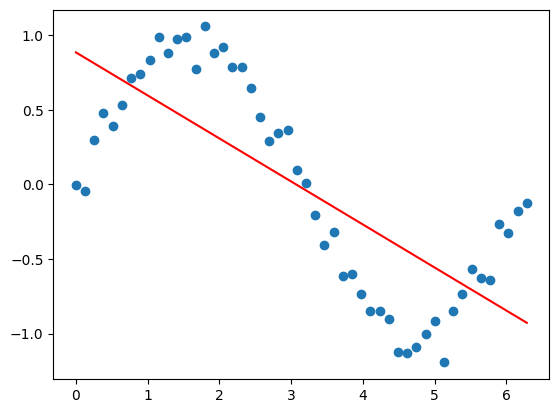

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data points for a sine function
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

# Add some noise to the data
noise = np.random.normal(0, 0.1, len(y))
y += noise

# Perform linear regression on the data
fit = np.polyfit(x, y, deg=1)
y_pred = np.polyval(fit, x)

# Plot the data and the fitted line
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()